In [1]:
from loreal_poc.datasets.dataset_300W import Dataset300W
from loreal_poc.visualisation.draw import draw_marks

from loreal_poc.datasets.base import FacialParts

from loreal_poc.datasets.dataloader import LandmarksDataloader, collate_custom



In [2]:
ds = Dataset300W(dir_path="../300W/300W/01_Indoor/")

In [3]:
data_item = ds[4]

In [4]:
data_item['marks']

array([[181.512, 175.594],
       [174.   , 214.573],
       [174.211, 253.35 ],
       [179.739, 293.299],
       [188.512, 333.153],
       [203.746, 369.576],
       [228.2  , 400.28 ],
       [253.713, 416.686],
       [283.375, 421.84 ],
       [320.048, 422.651],
       [364.738, 411.129],
       [406.135, 389.114],
       [441.668, 361.569],
       [466.956, 319.628],
       [481.079, 276.105],
       [482.849, 217.109],
       [486.588, 171.302],
       [181.989, 130.301],
       [195.652, 112.354],
       [216.469, 107.   ],
       [244.293, 109.446],
       [271.226, 118.84 ],
       [304.226, 115.679],
       [336.372, 112.914],
       [364.182, 112.594],
       [389.444, 117.725],
       [415.961, 127.227],
       [280.685, 148.613],
       [273.75 , 172.723],
       [263.818, 198.003],
       [255.754, 223.477],
       [236.724, 253.882],
       [250.085, 264.684],
       [268.138, 271.111],
       [290.434, 266.913],
       [310.453, 261.713],
       [198.328, 161.764],
 

In [5]:
facial_parts = FacialParts.right_eye + FacialParts.right_eyebrow

I modified slightly the FacialPart class so it can filter marks. 

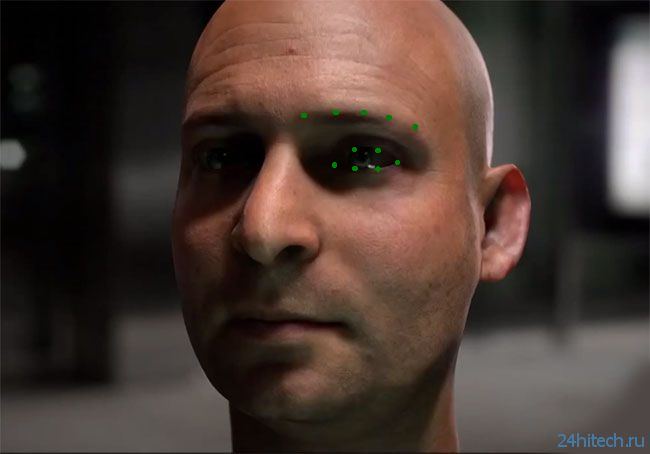

In [28]:
draw_marks(data_item['image'], [facial_parts.filter_marks(data_item['marks'])], ["green"])

In [20]:
# uses torch DataLoader, should support args from Pytorch docs.
loader = LandmarksDataloader(ds, batch_size=2, shuffle=True)

In [21]:
# batched data loading 
batched_inputs = next(iter(loader))

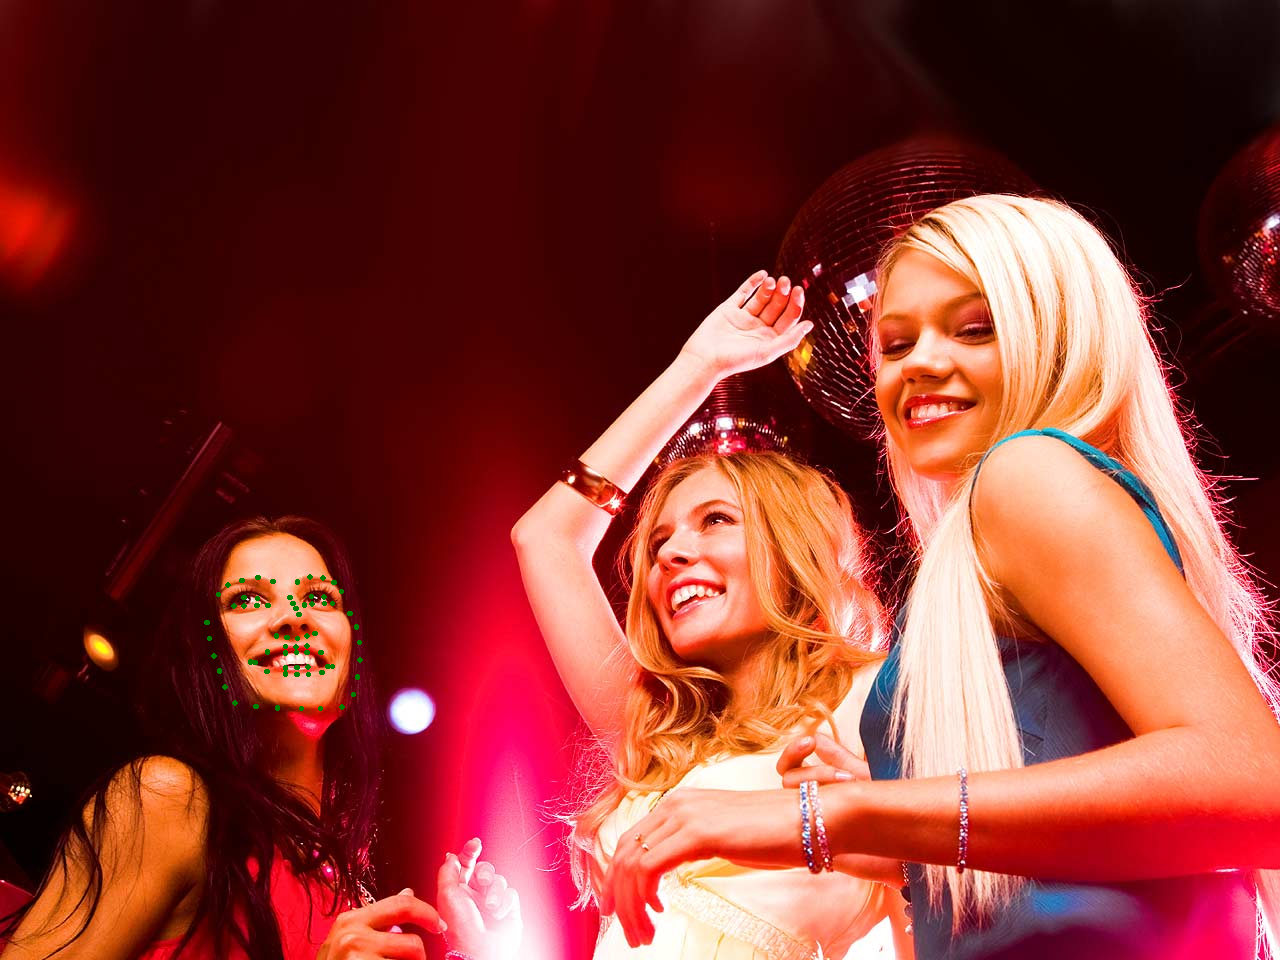

In [22]:
draw_marks(batched_inputs['image'][0], [batched_inputs['marks'][0]], ["green"])

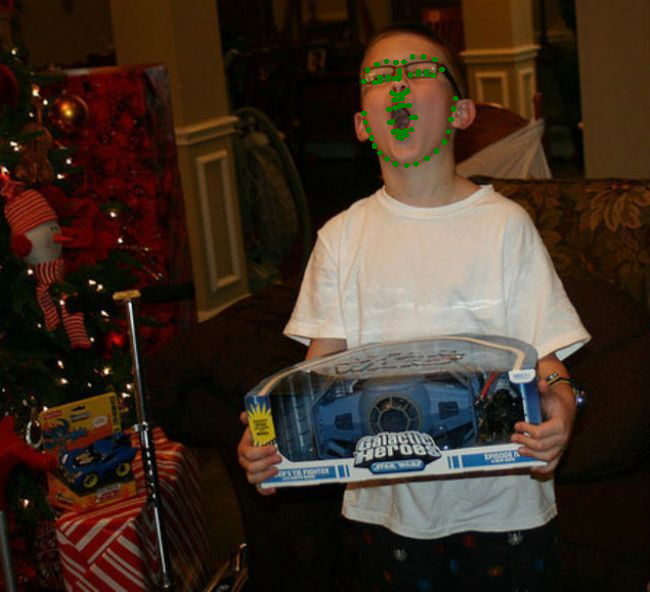

In [23]:
draw_marks(batched_inputs['image'][1], [batched_inputs['marks'][1]], ["green"])

Dataloading using dataset index or batch filter landmarks according to the facial part of the dataset.

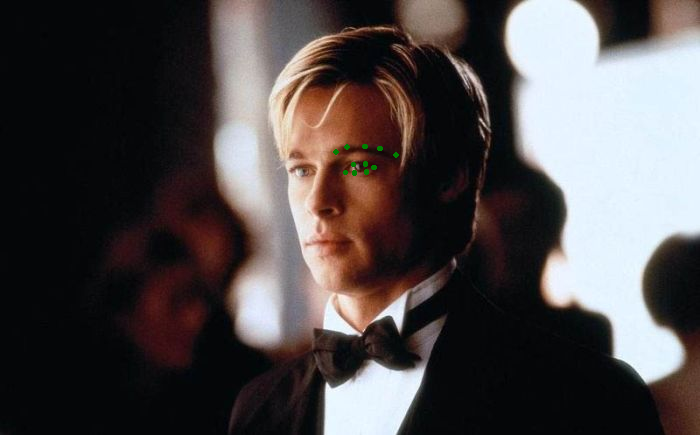

In [25]:
ds = Dataset300W(dir_path="../300W/300W/01_Indoor/", facial_part=facial_parts)
loader = LandmarksDataloader(ds, batch_size=2, shuffle=True)
batched_inputs = next(iter(loader))
draw_marks(batched_inputs['image'][0], [batched_inputs['marks'][0]], ["green"])